# PROYECTO DE PREDICCION DE CHURN TELECOM II

In [1]:
# Importar librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, f1_score, recall_score,
                             classification_report, ConfusionMatrixDisplay, mean_squared_error,
                             mean_absolute_error, r2_score)

from imblearn.over_sampling import SMOTE

import pickle

In [2]:
datos = pd.read_csv('/content/datos_tratados.csv')

In [3]:
datos.head()

,customerid,churn,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,...,paperlessbilling,paymentmethod,charges_monthly,charges_total,gender,seniorcitizen,partner,dependents,tenure,cuentas_diarias
0,0002-ORFBO,0,1,0,DSL,0,1,0,1,1,...,1,Mailed check,65.6,593.30,Female,0,1,1,9,2.19
1,0003-MKNFE,0,1,1,DSL,0,0,0,0,0,...,0,Mailed check,59.9,542.40,Male,0,0,0,9,2.00
2,0004-TLHLJ,1,1,0,Fiber optic,0,0,1,0,0,...,1,Electronic check,73.9,280.85,Male,0,0,0,4,2.46
3,0011-IGKFF,1,1,0,Fiber optic,0,1,1,0,1,...,1,Electronic check,98.0,1237.85,Male,1,1,0,13,3.27
4,0013-EXCHZ,1,1,0,Fiber optic,0,0,0,1,1,...,1,Mailed check,83.9,267.40,Female,1,1,0,3,2.80


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   int64  
 2   phoneservice      7267 non-null   int64  
 3   multiplelines     7267 non-null   int64  
 4   internetservice   7267 non-null   object 
 5   onlinesecurity    7267 non-null   int64  
 6   onlinebackup      7267 non-null   int64  
 7   deviceprotection  7267 non-null   int64  
 8   techsupport       7267 non-null   int64  
 9   streamingtv       7267 non-null   int64  
 10  streamingmovies   7267 non-null   int64  
 11  contract          7267 non-null   object 
 12  paperlessbilling  7267 non-null   int64  
 13  paymentmethod     7267 non-null   object 
 14  charges_monthly   7267 non-null   float64
 15  charges_total     7267 non-null   float64
 16  gender            7267 non-null   object 


In [5]:
datos.describe()

,churn,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges_monthly,charges_total,seniorcitizen,partner,dependents,tenure,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2279.287581,0.162653,0.484106,0.300124,32.346498,2.157292
std,0.437115,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2267.178963,0.369074,0.499782,0.458343,24.571773,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.610000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,401.400000,0.000000,0.000000,0.000000,9.000000,1.180000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,0.000000,0.000000,0.000000,29.000000,2.340000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,0.000000,1.000000,1.000000,55.000000,2.995000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,72.000000,3.960000


## 2. ANALISIS EXPLORATORIO (EDA)

In [6]:
# Analisis de variables categoricas
print(f"Contrato: {datos.contract.unique()}")
print(f"Servicio de Internet: {datos.internetservice.unique()}")
print(f"Género: {datos['gender'].unique()}")
print(f"Método de Pago: {datos['paymentmethod'].unique()}")

Contrato: ['One year' 'Month-to-month' 'Two year']
Servicio de Internet: ['DSL' 'Fiber optic' 'No']
Género: ['Female' 'Male']
Método de Pago: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [7]:
datos.churn.value_counts(normalize=True).round(3)

,proportion
churn,
0,0.743
1,0.257


In [8]:
# Identificar variables numericas
variables_numericas = datos.select_dtypes(include=['int64','float64']).columns
variables_numericas

Index(['churn', 'phoneservice', 'multiplelines', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'paperlessbilling', 'charges_monthly',
       'charges_total', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'cuentas_diarias'],
      dtype='object')

In [9]:
# Identificar la correlacion de variables
correlacion_numericas = datos[variables_numericas].corr().round(3)
correlacion_numericas

,churn,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges_monthly,charges_total,seniorcitizen,partner,dependents,tenure,cuentas_diarias
churn,1.000,0.013,0.039,-0.167,-0.080,-0.063,-0.160,0.062,0.061,0.187,0.190,-0.194,0.147,-0.149,-0.161,-0.344,0.190
phoneservice,0.013,1.000,0.280,-0.093,-0.052,-0.073,-0.098,-0.025,-0.034,0.014,0.247,0.114,0.010,0.019,-0.004,0.010,0.247
multiplelines,0.039,0.280,1.000,0.098,0.205,0.202,0.098,0.257,0.259,0.163,0.491,0.469,0.145,0.141,-0.028,0.332,0.491
onlinesecurity,-0.167,-0.093,0.098,1.000,0.286,0.276,0.356,0.177,0.190,-0.002,0.298,0.413,-0.038,0.141,0.084,0.327,0.298
onlinebackup,-0.080,-0.052,0.205,0.286,1.000,0.307,0.292,0.283,0.277,0.131,0.443,0.512,0.069,0.140,0.024,0.361,0.443
deviceprotection,-0.063,-0.073,0.202,0.276,0.307,1.000,0.332,0.394,0.403,0.105,0.484,0.524,0.060,0.153,0.015,0.362,0.484
techsupport,-0.160,-0.098,0.098,0.356,0.292,0.332,1.000,0.278,0.280,0.038,0.338,0.431,-0.059,0.116,0.063,0.322,0.338
streamingtv,0.062,-0.025,0.257,0.177,0.283,0.394,0.278,1.000,0.531,0.225,0.629,0.516,0.104,0.125,-0.015,0.281,0.629
streamingmovies,0.061,-0.034,0.259,0.190,0.277,0.403,0.280,0.531,1.000,0.212,0.628,0.521,0.119,0.116,-0.040,0.287,0.628
paperlessbilling,0.187,0.014,0.163,-0.002,0.131,0.105,0.038,0.225,0.212,1.000,0.354,0.160,0.158,-0.011,-0.112,0.008,0.354


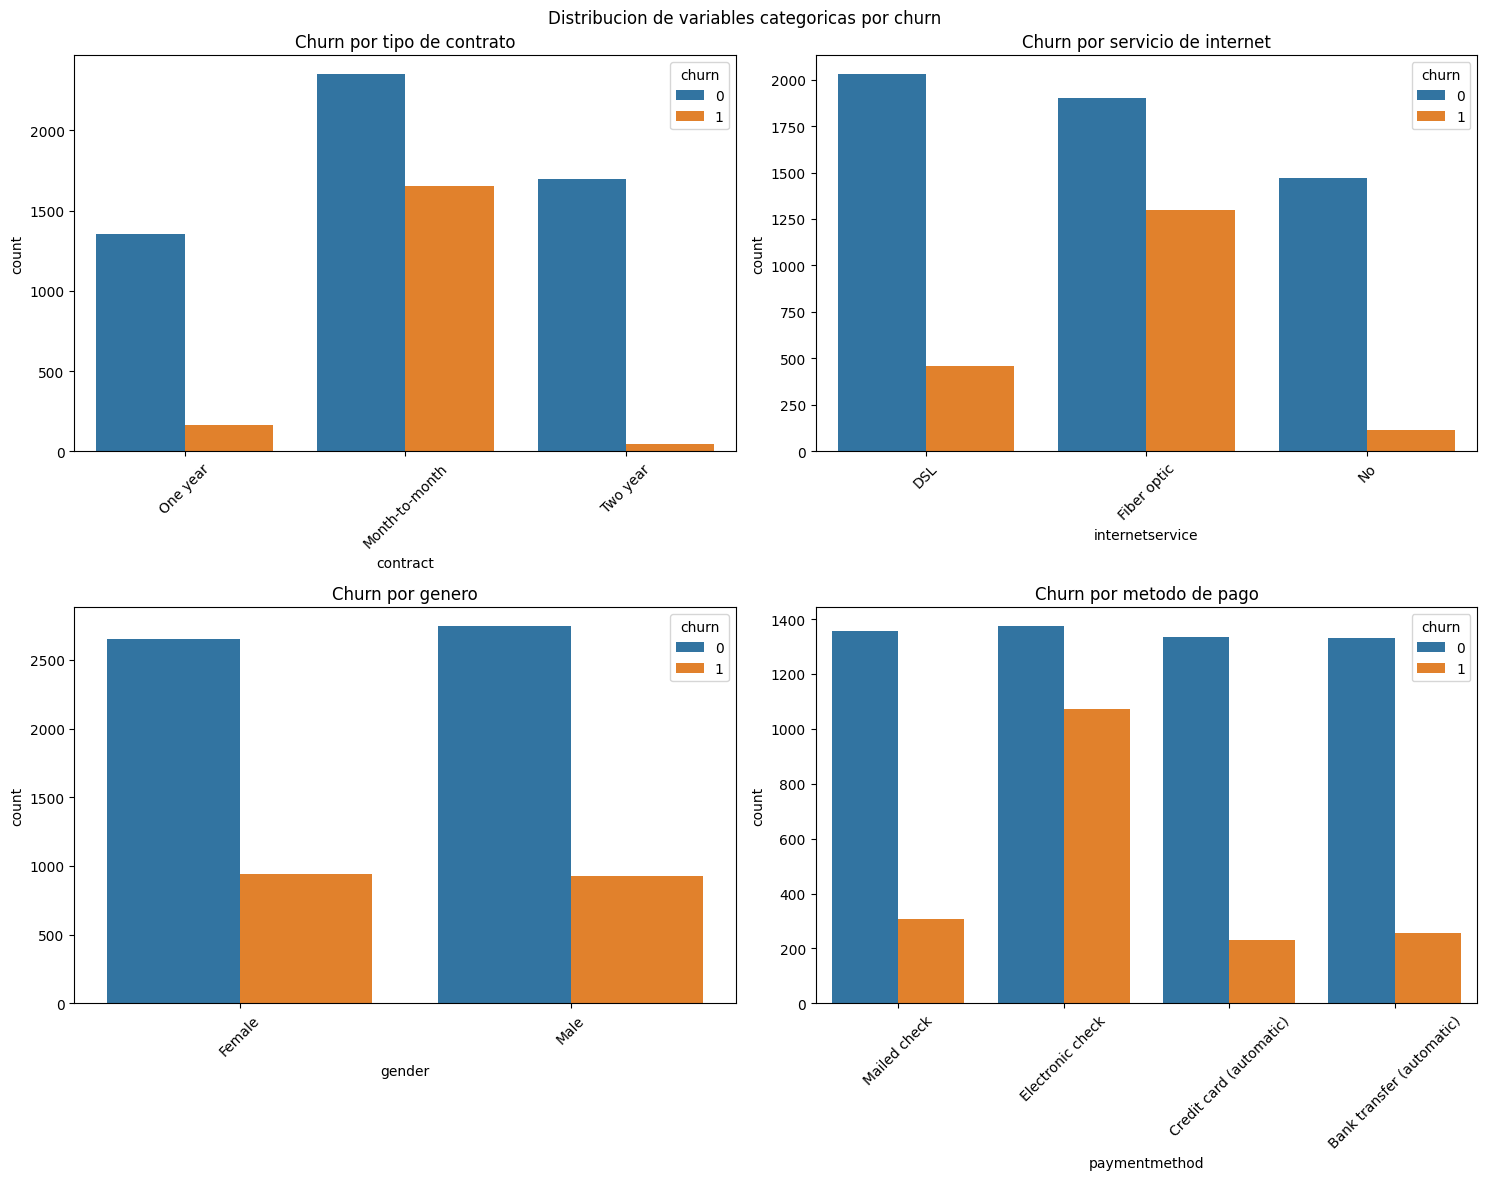

In [10]:
# Variables categoricas vs churn
fig, axes = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle('Distribucion de variables categoricas por churn')

sns.countplot(data=datos, x='contract', hue='churn', ax=axes[0,0])
axes[0,0].set_title('Churn por tipo de contrato')
axes[0,0].tick_params(axis='x', rotation=45)

sns.countplot(data=datos, x='internetservice', hue='churn', ax=axes[0,1])
axes[0,1].set_title('Churn por servicio de internet')
axes[0,1].tick_params(axis='x', rotation=45)

sns.countplot(data=datos, x='gender', hue='churn', ax=axes[1,0])
axes[1,0].set_title('Churn por genero')
axes[1,0].tick_params(axis='x', rotation=45)

sns.countplot(data=datos, x='paymentmethod', hue='churn', ax=axes[1,1])
axes[1,1].set_title('Churn por metodo de pago')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

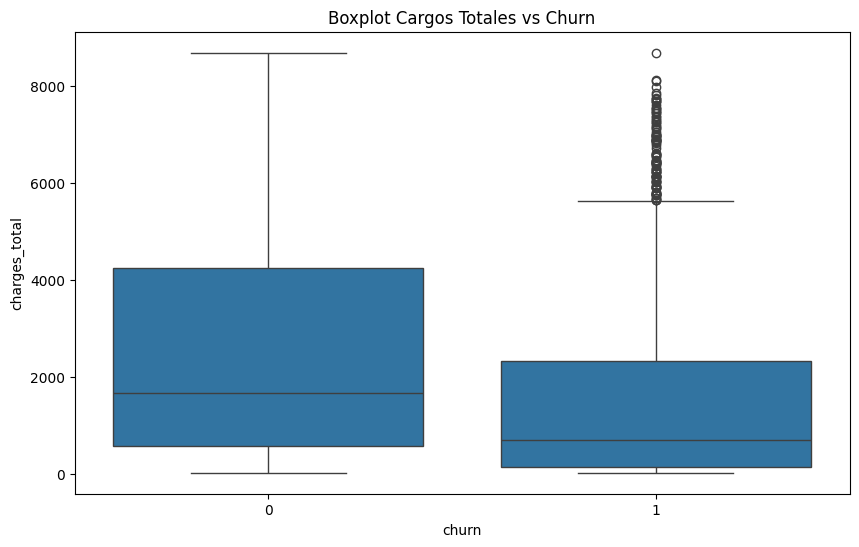

In [11]:
# Boxplot gasto total vs churn
plt.figure(figsize=(10,6))
sns.boxplot(data=datos, x='churn', y='charges_total')
plt.title('Boxplot Cargos Totales vs Churn')
plt.show()

## 3. Preprocesamiento de Datos

In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   int64  
 2   phoneservice      7267 non-null   int64  
 3   multiplelines     7267 non-null   int64  
 4   internetservice   7267 non-null   object 
 5   onlinesecurity    7267 non-null   int64  
 6   onlinebackup      7267 non-null   int64  
 7   deviceprotection  7267 non-null   int64  
 8   techsupport       7267 non-null   int64  
 9   streamingtv       7267 non-null   int64  
 10  streamingmovies   7267 non-null   int64  
 11  contract          7267 non-null   object 
 12  paperlessbilling  7267 non-null   int64  
 13  paymentmethod     7267 non-null   object 
 14  charges_monthly   7267 non-null   float64
 15  charges_total     7267 non-null   float64
 16  gender            7267 non-null   object 


In [13]:
# Eliminar columnas innecesarias
datos = datos.drop(['customerid', 'cuentas_diarias'], axis=1) # Eliminamos cuentas_diarias porque se correlacionan casi igual con charges monthly

In [14]:
#Definir variables categoricas
categoricas = ['contract', 'paymentmethod', 'gender', 'internetservice']

In [15]:
# Codificacion one-hot para las variables categoricas
datos_codificados = pd.get_dummies(data = datos, columns=categoricas, dtype=int)

In [16]:
# Separacion de caracteristicas y variable objetivo
X = datos_codificados.drop('churn', axis=1)
y = datos_codificados.churn

In [17]:
# un vistazo a los datos
datos.sample(5)

,churn,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,gender,seniorcitizen,partner,dependents,tenure
2181,0,1,0,DSL,0,0,1,0,0,1,One year,0,Credit card (automatic),58.55,3503.50,Female,0,0,0,63
2015,1,1,1,Fiber optic,0,0,1,0,0,1,Month-to-month,1,Electronic check,87.25,1258.60,Female,0,1,1,14
2011,0,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Credit card (automatic),75.35,3161.40,Male,0,0,0,43
5605,0,1,0,Fiber optic,0,0,1,0,1,0,Month-to-month,0,Bank transfer (automatic),86.55,1857.25,Male,1,1,0,21
4445,0,1,0,DSL,1,0,1,0,0,0,One year,1,Credit card (automatic),54.45,3674.95,Female,0,0,0,68


In [18]:
# Normalizacion de variables numericas
scaler = MinMaxScaler()
columnas_numericas = ['charges_total', 'charges_monthly', 'tenure']
X[columnas_numericas] = scaler.fit_transform(X[columnas_numericas])

In [19]:
# Dimensiones del dataset modificado
print(f"{X.shape}")
print(f"{y.shape}")

(7267, 27)
(7267,)


In [20]:
X.head()

,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges_monthly,...,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,gender_Female,gender_Male,internetservice_DSL,internetservice_Fiber optic,internetservice_No
0,1,0,0,1,0,1,1,0,1,0.471144,...,0,0,0,0,1,1,0,1,0,0
1,1,1,0,0,0,0,0,1,0,0.414428,...,0,0,0,0,1,0,1,1,0,0
2,1,0,0,0,1,0,0,0,1,0.553731,...,0,0,0,1,0,0,1,0,1,0
3,1,0,0,1,1,0,1,1,1,0.793532,...,0,0,0,1,0,0,1,0,1,0
4,1,0,0,0,0,1,1,0,1,0.653234,...,0,0,0,0,1,1,0,0,1,0


## 4. Division de datos y balanceo de clases

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Distribucion de clases en los datos de entrenamiento")
print(pd.Series(y_train).value_counts(normalize=True))

Distribucion de clases en los datos de entrenamiento
churn
0    0.742818
1    0.257182
Name: proportion, dtype: float64


In [22]:
# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [23]:
pd.Series(y_train_balanced).value_counts(normalize=True)

,proportion
churn,
0,0.5
1,0.5


In [24]:
# las nuevas dimensiones
print(f"{X_train_balanced.shape}")
print(f"{X_test.shape}")
print(f"{y_train_balanced.shape}")
print(f"{y_test.shape}")

(8636, 27)
(1454, 27)
(8636,)
(1454,)


In [25]:
def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"Resultados para {nombre_modelo}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print("\nMatriz de Confusión:")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.show()
    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred))
    print("-"*60)

In [26]:
# Entrenamiento de modelos
modelos = {
    'Arbol de Decision': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=5, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

Entrenando Arbol de Decision ...
Resultados para Arbol de Decision:
Accuracy: 0.7517
Precision: 0.5120
Recall: 0.7406
F1-Score: 0.6055

Matriz de Confusión:


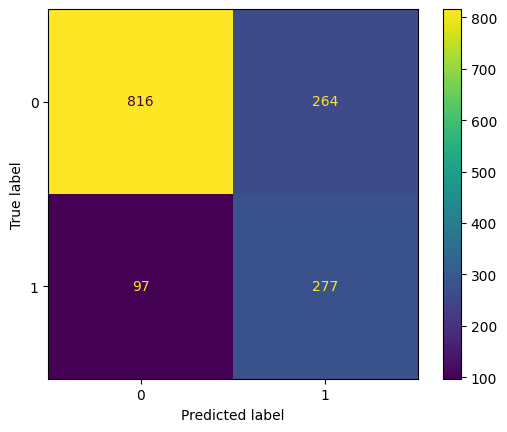


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1080
           1       0.51      0.74      0.61       374

    accuracy                           0.75      1454
   macro avg       0.70      0.75      0.71      1454
weighted avg       0.80      0.75      0.76      1454

------------------------------------------------------------
Entrenando Random Forest ...
Resultados para Random Forest:
Accuracy: 0.7552
Precision: 0.5154
Recall: 0.8075
F1-Score: 0.6292

Matriz de Confusión:


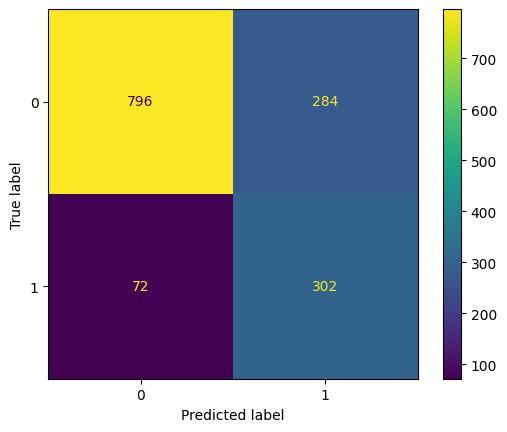


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1080
           1       0.52      0.81      0.63       374

    accuracy                           0.76      1454
   macro avg       0.72      0.77      0.72      1454
weighted avg       0.81      0.76      0.77      1454

------------------------------------------------------------
Entrenando KNN ...
Resultados para KNN:
Accuracy: 0.7111
Precision: 0.4606
Recall: 0.7193
F1-Score: 0.5616

Matriz de Confusión:


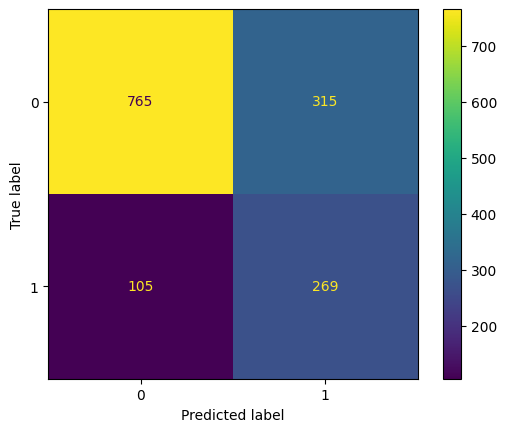


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      1080
           1       0.46      0.72      0.56       374

    accuracy                           0.71      1454
   macro avg       0.67      0.71      0.67      1454
weighted avg       0.77      0.71      0.73      1454

------------------------------------------------------------


In [27]:
# Evaluacion de cada modelo
for nombre, modelo in modelos.items():
  print(f'Entrenando {nombre} ...')
  modelo.fit(X_train_balanced, y_train_balanced)
  y_pred = modelo.predict(X_test)
  evaluar_modelo(y_test, y_pred, nombre)

In [28]:
# Validacion cruzada
print('Realizando validacion cruzada')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
modelo_rf = RandomForestClassifier(max_depth=5, random_state=42)
cv_scores = cross_validate(modelo_rf, X_train_balanced, y_train_balanced, cv=cv, scoring=['accuracy', 'precision',
                                                                                          'recall','f1'])

Realizando validacion cruzada


In [29]:
# Mostrar resultados de validación cruzada
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    scores = cv_scores[f'test_{metric}']
    print(f"\n{metric.capitalize()}:")
    print(f"Media: {scores.mean():.4f}")
    print(f"Desviación estándar: {scores.std():.4f}")
    print(f"Intervalo de confianza: [{scores.mean() - 2*scores.std():.4f}, {scores.mean() + 2*scores.std():.4f}]")


Accuracy:
Media: 0.7846
Desviación estándar: 0.0049
Intervalo de confianza: [0.7749, 0.7944]

Precision:
Media: 0.7561
Desviación estándar: 0.0098
Intervalo de confianza: [0.7364, 0.7757]

Recall:
Media: 0.8409
Desviación estándar: 0.0113
Intervalo de confianza: [0.8183, 0.8635]

F1:
Media: 0.7961
Desviación estándar: 0.0035
Intervalo de confianza: [0.7890, 0.8032]


## 6. Optimizar el modelo

In [30]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [100, 200, 300]
}

In [31]:
# Crear el modelo base
rf_base = RandomForestClassifier(random_state=42)

In [32]:
# Crear el objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1',
    verbose=1
)

In [33]:
# Realizar la búsqueda de hiperparámetros
print("Iniciando búsqueda de hiperparámetros...")
grid_search.fit(X_train_balanced, y_train_balanced)


Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [34]:
# Mostrar los mejores parámetros y puntuación
print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)
print(f"\nMejor puntuación F1: {grid_search.best_score_:.4f}")


Mejores parámetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Mejor puntuación F1: 0.8253



Rendimiento del modelo optimizado en el conjunto de prueba:
Resultados para Random Forest Optimizado:
Accuracy: 0.7717
Precision: 0.5393
Recall: 0.7701
F1-Score: 0.6344

Matriz de Confusión:


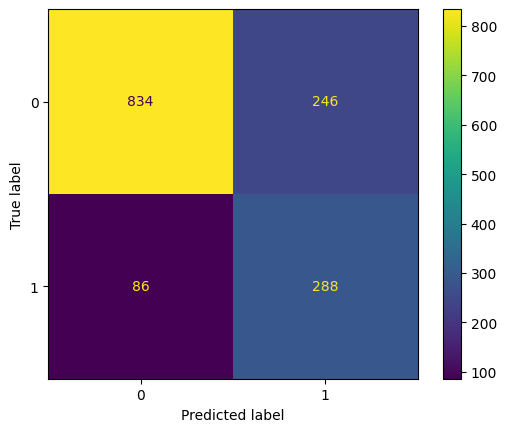


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1080
           1       0.54      0.77      0.63       374

    accuracy                           0.77      1454
   macro avg       0.72      0.77      0.73      1454
weighted avg       0.81      0.77      0.78      1454

------------------------------------------------------------


In [35]:
# Evaluar el modelo optimizado en el conjunto de prueba
mejor_modelo = grid_search.best_estimator_
y_pred_optimizado = mejor_modelo.predict(X_test)
print("\nRendimiento del modelo optimizado en el conjunto de prueba:")
evaluar_modelo(y_test, y_pred_optimizado, "Random Forest Optimizado")

## 7. Guardar y cargar el modelo

In [36]:
# Guardar el modelo optimizado
modelo_nombre = 'modelo_churn_optimizado.pkl'

In [37]:
try:
    with open(modelo_nombre, 'wb') as file:
        pickle.dump(mejor_modelo, file)
    print(f"Modelo guardado exitosamente como '{modelo_nombre}'")
except Exception as e:
    print(f"Error al guardar el modelo: {str(e)}")

Modelo guardado exitosamente como 'modelo_churn_optimizado.pkl'


In [38]:
# Cargar el modelo y hacer una predicción de ejemplo
try:
    with open(modelo_nombre, 'rb') as file:
        modelo_cargado = pickle.load(file)
    print("Modelo cargado exitosamente")

    # Crear un ejemplo para predicción
    ejemplo = X_test.iloc[0].values.reshape(1, -1)
    prediccion = modelo_cargado.predict(ejemplo)
    probabilidades = modelo_cargado.predict_proba(ejemplo)

    print("\nEjemplo de predicción:")
    print(f"Predicción: {'Abandono' if prediccion[0] == 1 else 'No Abandono'}")
    print(f"Probabilidad de abandono: {probabilidades[0][1]:.4f}")

except Exception as e:
    print(f"Error al cargar el modelo: {str(e)}")

Modelo cargado exitosamente

Ejemplo de predicción:
Predicción: No Abandono
Probabilidad de abandono: 0.2644


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Importancia de variables

**Modelo base:** Random Forest optimizado con GridSearchCV dentro de un Pipeline (one-hot para categóricas y MinMax para numéricas, sin fugas).  
**Qué mide:** `feature_importances_` indica cuánto aporta cada variable a la reducción de impureza en el bosque.

**Variables con mayor peso (agrupadas a nivel de atributo original):**
- **charges_total (Cargos totales):** acumulados altos ↗ probabilidad de churn.
- **charges_monthly (Cargos mensuales):** mensualidad alta ↗ riesgo de churn.
- **tenure (Antigüedad):** menor antigüedad ↗ riesgo (clientes nuevos se van más).
- **contract (Tipo de contrato):** “month-to-month” suele churnar más que contratos de mayor duración.
- **paymentmethod (Método de pago):** ciertos métodos muestran mayor asociación con churn.
- **internetservice (Tipo/paquete de internet):** la presencia/ausencia y tipo de servicio influye en la decisión.

> Nota: en KNN la “importancia” se refleja en cómo cada variable afecta la **distancia**; por eso la **normalización** de numéricas (p. ej., `charges_total`, `charges_monthly`, `tenure`) es clave. En Árbol de Decisión, las variables que aparecen en los primeros *splits* suelen ser las más relevantes.

---

# Conclusión

**Qué aprendimos del modelo:**
- **Cargos altos (mensual y total)**: aumentan la probabilidad de cancelación.
- **Antigüedad baja**: clientes recientes presentan mayor propensión a irse.
- **Contrato mensual**: mayor riesgo frente a contratos de largo plazo.
- **Método de pago**: algunos métodos se asocian con más churn.
- **Servicios contratados**: el tipo/paquete de internet y extras modulan el riesgo.

**Acciones recomendadas:**
- **Migración de contratos:** incentivar a “month-to-month” a planes de mayor duración.
- **Onboarding reforzado:** programas de bienvenida/seguimiento en los primeros meses.
- **Revisión de precios/paquetes:** ofrecer bundles o ajustes a clientes con cargos elevados.
- **Intervención proactiva:** priorizar clientes en riesgo con base en las variables más influyentes.
- **Valor añadido:** promover servicios que eleven el valor percibido.

> En síntesis: las variables de **precio**, **antigüedad** y **contrato** dominan el churn. Con estas señales, se puede orientar mejor la retención y reducir la cancelación.
